In [1]:
import Objects.population as pop
import numpy as np
from scipy.spatial import distance_matrix
from scipy.spatial.distance import cdist
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
test_board = np.array([[9, 4, 7, 3, 2, 6, 5, 8, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [4, 7, 3, 5, 9, 2, 1, 6, 8],
       [1, 2, 9, 8, 0, 4, 7, 3, 5],
       [5, 6, 8, 7, 1, 3, 4, 9, 2],
       [7, 9, 2, 4, 5, 8, 3, 1, 6],
       [6, 1, 5, 2, 3, 9, 8, 7, 4],
       [3, 8, 4, 6, 7, 1, 2, 5, 9]])

In [17]:
# !pip install py-sudoku
from sudoku import Sudoku 

In [18]:
puzzle = Sudoku(3).difficulty(0.2)
test_board = np.where(np.array(puzzle.board) == None, 0, np.array(puzzle.board)).astype(int)
test_board

array([[7, 2, 5, 1, 0, 0, 6, 3, 8],
       [1, 0, 6, 3, 7, 8, 4, 0, 5],
       [0, 8, 4, 6, 2, 5, 7, 9, 1],
       [2, 4, 9, 0, 8, 6, 1, 7, 3],
       [8, 7, 3, 9, 1, 0, 0, 4, 6],
       [5, 6, 1, 0, 0, 4, 9, 8, 2],
       [4, 3, 7, 2, 0, 1, 8, 0, 9],
       [9, 1, 0, 8, 5, 7, 0, 6, 4],
       [0, 5, 8, 4, 9, 3, 2, 1, 0]])

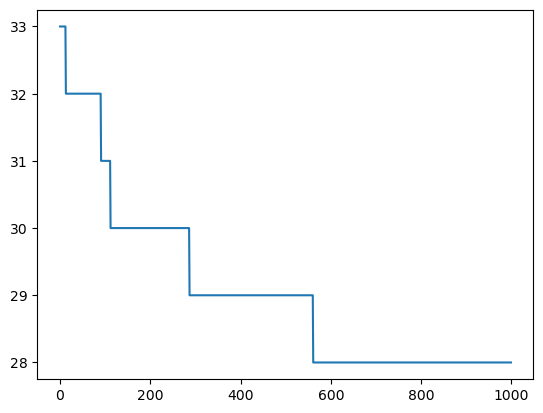

In [23]:
plt.plot(pd.DataFrame(population.history).T[0])

In [5]:
test_board = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [9, 6, 2, 0, 5, 7, 0, 4, 3],
       [0, 5, 7, 8, 3, 4, 2, 0, 9],
       [7, 3, 0, 5, 8, 9, 4, 2, 6],
       [8, 2, 4, 6, 7, 1, 9, 0, 5],
       [6, 9, 5, 3, 4, 2, 0, 7, 8]])

In [19]:
histories = []

for i in tqdm(range(20)):
    population = pop.Population(size=1000, initial_board=test_board)
    population.evolve(
        gens = 50,
        xo_prob = 0.9,
        mut_prob = 0.5,
        select_type='roulette',
        xo='multi_point',
        mutation='swap-smart',
        elite_size=100,
        swap_number=1,
        diversify='fitness-sharing',
        verbose= True
    )
    histories.append(population.history)
# population.plot_history(ma_smooth_ratio=0.05, genodiv=False, phenodiv=True)

  0%|          | 0/20 [00:00<?, ?it/s]

Best individual of gen #1: 21
Best individual of gen #2: 20


  0%|          | 0/20 [00:01<?, ?it/s]


KeyboardInterrupt: 

In [27]:
population = pop.Population(size=1000, initial_board=test_board)

# population.evolve(
#         gens = 50,
#         xo_prob = 0.9,
#         mut_prob = 0.0,
#         select_type='roulette',
#         xo='cycle',
#         mutation='swap-smart',
#         elite_size=10,
#         swap_number=1,
#         diversify='fitness-sharing',
#         verbose= True
#     )

In [28]:
np.bincount(population.individuals[0].swappable)

array([0, 2, 2, 3, 2, 2, 3, 2, 2, 1])

In [29]:
np.bincount(population.individuals[1].swappable)

array([0, 2, 1, 2, 2, 3, 3, 2, 2, 2])

In [25]:
np.bincount(population.individuals[2].swappable)

array([0, 2, 2, 1, 2, 3, 3, 2, 2, 2])

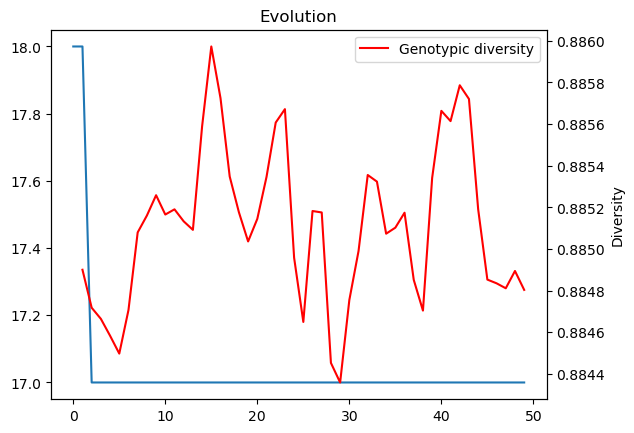

In [14]:
population.plot_history(genodiv=True)

In [4]:
prob = 1

population.cycle_crossover(prob)

[3, 5, 15, 16, 18]
[1, 2, 3, 4, 12]
[6, 7, 8, 11, 14, 15, 16, 17, 18]
[2, 3, 4, 6, 7, 8, 9, 10, 11, 14, 15, 16, 17, 18]
[4, 6, 9, 12, 14, 18]
[1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17]
[2, 3, 8, 11, 12, 13, 15, 18]
[6, 12, 16]
[3, 6, 7, 8, 9, 13, 14, 15, 16, 17]
[1, 2, 6, 8, 10, 12, 14, 15, 16]
[5, 9, 14, 16]
[4, 9, 17, 18]
[1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 17]
[1, 6, 11, 13]
[1, 2, 4, 5, 9, 10, 12, 13, 14, 16, 17]
[3, 5, 6, 7, 8, 10, 13, 14, 15, 16, 17, 18]
[3, 6, 14, 15]
[2, 9, 11, 12, 15, 16]
[8, 10, 11, 12, 13, 15, 17]
[1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 16]
[3, 5, 7, 12, 13, 18]
[1, 3, 4, 5, 6, 11, 15, 17]
[1, 2, 3, 5, 6, 8, 18]
[2, 3, 4, 5, 10, 11, 15, 17, 18]
[1, 2, 3, 11, 12, 13, 14, 16]
[4, 5, 8, 9, 10, 12, 15, 17, 18]
[2, 3, 5, 6, 9, 11, 14]
[7, 12]
[1, 3, 5, 6, 9, 10, 12, 13, 15, 18]
[1, 4, 6, 18]
[1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
[6, 8, 12, 13, 16, 17, 18]
[1, 2, 3, 4, 6, 7, 8, 9, 13, 15, 16, 18]
[1, 2, 3, 5, 6, 8, 9, 10

In [21]:
population.individuals[0].swappable

array([9, 7, 7, 6, 9, 3, 5, 7, 6, 6, 7, 3, 6, 7, 3, 6])

In [4]:
population.get_distances(normalize=True).max()

1.0

In [22]:
prob = 0.1

population_array = np.array([i.swappable for i in population.individuals])
                
# Get the number of parents and the shape of each parent
num_parents = len(population)
rows, cols = population_array.shape

# Sample how many crossovers to do
num_crossovers = sum(np.random.choice([0,1], size = int(num_parents/2), replace=True, p=[1-prob, prob]))

# Select two random parents for each offspring without replacement
parent_indices = np.random.choice(num_parents, size=(num_crossovers,2), replace=False)

# Matrices with parents from both sides
parent1 = population_array[parent_indices[:, 0]]
parent2 = population_array[parent_indices[:, 1]]

for i in range(len(parent1)):
    indicator = True
    current_position = 0
    available_indicies = list(np.arange(len(parent1[i])))
    while indicator:
        parent1[current_position]


In [76]:
parent1 = np.array([[1,3,6,5,5,4,9,9]])
parent2 = np.array([[9,1,3,5,6,9,5,4]])

In [61]:
parent1[0]

array([1, 3, 6, 5, 5, 4, 9, 9])

In [81]:
parent1[i][available_indicies]

array([3, 5, 4, 9])

In [86]:
mask = np.zeros(len(parent1[i]))
mask[available_indicies] = True
mask*parent1[i]

array([0., 3., 0., 0., 5., 4., 0., 9.])

In [91]:
np.where(mask*parent1[i] == parent2[i][current_position])[0]

array([], dtype=int64)

In [146]:
prob = 0.1

population_array = np.array([i.swappable for i in population.individuals])
                
# Get the number of parents and the shape of each parent
num_parents = len(population)
rows, cols = population_array.shape

# Sample how many crossovers to do
num_crossovers = sum(np.random.choice([0,1], size = int(num_parents/2), replace=True, p=[1-prob, prob]))

# Select two random parents for each offspring without replacement
parent_indices = np.random.choice(num_parents, size=(num_crossovers,2), replace=False)

# Matrices with parents from both sides
parent1 = population_array[parent_indices[:, 0]]
parent2 = population_array[parent_indices[:, 1]]

for i in range(len(parent1)):
    indicator = True
    current_position = 0
    available_indicies = list(np.arange(len(parent1[i])))
    while indicator:
        available_indicies.remove(current_position)
        mask = np.zeros(len(parent1[i]))
        mask[available_indicies] = True
        possible_next_indicies = np.where(mask*parent1[i] == parent2[i][current_position])[0]
        if len(possible_next_indicies) == 0:
            indicator = False
        else:
            current_position = np.random.choice(possible_next_indicies)
    print(available_indicies)
    all_indicies = list(np.arange(len(parent1[i])))
    used_indicies = list(set(all_indicies) - set(available_indicies))
    offspring1 = np.zeros(len(parent1[i]), dtype=int)
    offspring2 = np.zeros(len(parent1[i]), dtype=int)

    offspring1[available_indicies] = parent2[i][available_indicies]
    offspring1[used_indicies] = parent1[i][used_indicies]
    offspring2[available_indicies] = parent1[i][available_indicies]
    offspring2[used_indicies] = parent2[i][used_indicies]

[1, 5, 6, 7, 8, 9, 10, 13, 14, 15]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15]
[1, 2, 3, 4, 5, 6, 8, 10, 12, 13, 14]
[2, 3, 5, 6, 7, 8, 9, 10, 11, 13, 14]
[1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[2, 5, 11, 13]
[1, 2, 3, 4, 5, 7, 9, 10, 12, 13, 14, 15]
[1, 2, 3, 5, 6, 8, 9, 10, 14, 15]
[1, 2, 3, 7, 8, 9, 10, 11, 12, 14, 15]
[1, 4, 5, 6, 9, 11, 12, 13, 14]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 13]
[8, 13, 15]
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[1, 2, 3, 4, 5, 7, 8, 10, 11]
[1, 2, 3, 5, 6, 8, 10, 11, 12, 15]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[1, 2, 3, 4, 6, 7, 8, 10, 11, 13, 14, 15]
[1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 15]
[1, 2, 3, 5, 6, 7, 8, 9,

In [145]:
list(np.arange(len(parent1[i])))

IndexError: index 48 is out of bounds for axis 0 with size 48

In [138]:
parent1

array([[1, 3, 6, 5, 5, 4, 9, 9]])

In [139]:
parent2

array([[9, 1, 3, 5, 6, 9, 5, 4]])

In [141]:
offspring2

array([9, 1, 3, 5, 6, 4, 5, 9])

In [134]:
used_indicies

[0, 1, 2, 4, 6]

In [135]:
parent1[i][used_indicies]

array([1, 3, 6, 5, 9])

In [114]:
offspring1 = np.zeros(len(parent1[i]))

In [129]:
list(set(all_indicies) - set(available_indicies))

[0, 1, 2, 4, 6]

In [124]:
offspring1[available_indicies] = parent2[i][available_indicies]

In [125]:
offspring1

array([0., 0., 0., 5., 0., 9., 0., 4.])

In [122]:
parent2[0][available_indicies]

array([5, 9, 4])

In [110]:
parent2[available_indicies]

array([], shape=(0, 8), dtype=int64)

In [ ]:
self[i].swappable[indices_to_mask] = values_add

In [59]:
np.where(parent1[i][available_indicies] == parent2[i][current_position])[0]

array([], dtype=int64)

In [58]:
np.random.choice(np.where(parent1[i][available_indicies] == parent2[i][current_position])[0])

ValueError: 'a' cannot be empty unless no samples are taken

In [54]:
available_indicies

[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15]

In [49]:
np.where(parent1[i][available_indicies] == parent2[i][current_position])[0]

array([ 0,  3, 12])

In [48]:
np.random.choice(np.where(parent1[i][available_indicies] == parent2[i][current_position])[0])

12

In [37]:
i = 0
available_indicies = list(np.arange(len(parent1[i])))

In [41]:
parent1[0][[1,2,3,4]]

array([6, 3, 7, 5])

In [33]:
available_indicies = np.delete(available_indicies, 0)

In [34]:
available_indicies

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [27]:
np.arange(len(parent1[0]))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [23]:
parent1[0]

array([6, 6, 3, 7, 5, 9, 2, 3, 7, 3, 3, 5, 3, 6, 5, 7])

In [25]:
np.where(parent1[0] == 5)

(array([ 4, 11, 14]),)

In [24]:
parent2[0]

array([5, 2, 4, 5, 3, 9, 9, 4, 5, 7, 4, 6, 7, 2, 7, 5])

In [12]:
parent1.shape

(52, 19)

In [5]:
population.get_distances(normalize=False)

array([16791, 16825, 16731, 16818, 16860, 16833, 16892, 16884, 16808,
       16792, 16854, 16744, 16740, 16790, 16802, 16866, 16747, 16792,
       16877, 16780, 16835, 16803, 16775, 16848, 16845, 16807, 16806,
       16851, 16748, 16807, 16903, 16805, 16934, 16865, 16729, 16893,
       16876, 16810, 16733, 16869, 16834, 16897, 16851, 16735, 16913,
       16823, 16887, 16841, 16947, 16770, 16828, 16712, 16710, 16845,
       16842, 16917, 16809, 16830, 16883, 16878, 16892, 16848, 16847,
       16860, 16743, 16803, 16775, 16773, 16807, 16904, 16813, 16929,
       16804, 16832, 16761, 16866, 16851, 16770, 16823, 16725, 16878,
       16807, 16835, 16858, 16752, 16904, 16775, 16881, 16877, 16884,
       16867, 16823, 16860, 16907, 16835, 16794, 16863, 16781, 16756,
       16836, 16753, 16827, 16859, 16885, 16785, 16867, 16832, 16899,
       16798, 16842, 16931, 16736, 16870, 16919, 16841, 16861, 16875,
       16864, 16861, 16785, 16922, 16756, 16858, 16911, 16763, 16886,
       16854, 16845,

In [15]:
from scipy.spatial.distance import cdist

# Example data
X = [[0, 1, 0, 1],
     [1, 1, 0, 0],
     [0, 0, 1, 1]]
Y = [[1, 0, 1, 0],
     [1, 1, 0, 1]]
n_dimensions = len(X[0])  # Assuming all vectors have the same length
weights = np.ones(n_dimensions)
distances = cdist(X, Y, metric='hamming')


print(distances)


[[1.   0.25]
 [0.5  0.25]
 [0.5  0.75]]


In [19]:
individuals.shape

(1000, 43)

In [24]:
individuals = np.array([ind.swappable for ind in population.individuals])

cdist(individuals, individuals, metric = 'hamming', w=np.ones(43))

array([[0.        , 0.86046512, 0.79069767, ..., 0.79069767, 0.88372093,
        0.88372093],
       [0.86046512, 0.        , 0.90697674, ..., 0.93023256, 0.97674419,
        0.76744186],
       [0.79069767, 0.90697674, 0.        , ..., 0.8372093 , 0.90697674,
        0.8372093 ],
       ...,
       [0.79069767, 0.93023256, 0.8372093 , ..., 0.        , 0.95348837,
        0.79069767],
       [0.88372093, 0.97674419, 0.90697674, ..., 0.95348837, 0.        ,
        0.90697674],
       [0.88372093, 0.76744186, 0.8372093 , ..., 0.79069767, 0.90697674,
        0.        ]])

In [94]:
population.get_distances(normalize=True)

array([0.1460076 , 0.41064639, 0.45019011, 0.54448669, 0.26844106,
       0.66768061, 0.68593156, 0.59619772, 0.66539924, 0.41977186,
       0.39923954, 0.52927757, 0.54296578, 0.60304183, 0.38631179,
       0.44714829, 0.54980989, 0.4539924 , 0.52395437, 0.4539924 ,
       0.46387833, 0.51178707, 0.81520913, 0.52395437, 0.65323194,
       0.59619772, 0.68365019, 0.60532319, 0.53079848, 0.48973384,
       0.55437262, 0.52015209, 0.21749049, 0.12395437, 0.4418251 ,
       0.59087452, 0.4418251 , 0.7756654 , 0.42737643, 0.63878327,
       0.53307985, 0.60836502, 0.46692015, 0.51406844, 0.66463878,
       0.63726236, 0.59619772, 0.55741445, 0.39467681, 0.42813688,
       0.63878327, 0.53688213, 0.65323194, 0.65171103, 0.72623574,
       0.44486692, 0.40076046, 0.30646388, 0.63422053, 0.49353612,
       0.27452471, 0.70494297, 0.32471483, 0.67528517, 0.65247148,
       0.16882129, 0.31558935, 0.58935361, 0.37414449, 0.53764259,
       0.41520913, 0.59771863, 0.41292776, 0.34524715, 0.80684

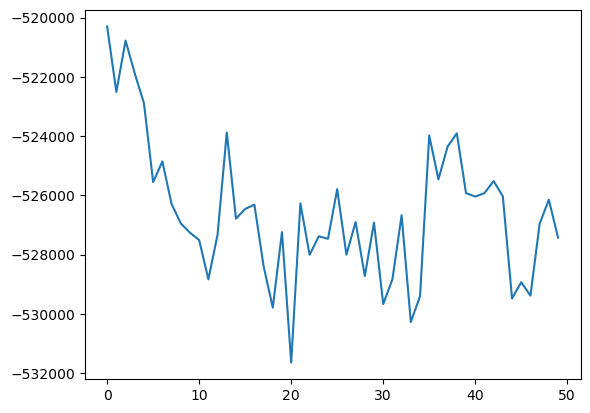

In [93]:
for i in histories:
    plt.plot(pd.DataFrame(i).T[1])

In [33]:
population = pop.Population(
initial_board=test_board,
size=10000
)

population.evolve(gens = 2000,
                    xo_prob = 0,
                    mut_prob = 0.8, 
                    select_type='tournament', 
                    xo = 'multi_point', 
                    elite_size= 10,
                    keep_distribution=False,
                    mutation='change', 
                    swap_number = 3)

Best individual of gen #1: 45. Mean fitness: 63.3059
Best individual of gen #2: 45. Mean fitness: 64.251
Best individual of gen #3: 45. Mean fitness: 63.6732
Best individual of gen #4: 45. Mean fitness: 63.6267


KeyboardInterrupt: 

array([[0, 2, 9, 0, 7, 1, 4, 0, 6],
       [0, 0, 4, 6, 8, 3, 0, 0, 7],
       [6, 7, 0, 9, 0, 0, 0, 0, 8],
       [0, 0, 0, 4, 0, 7, 0, 0, 3],
       [0, 6, 2, 0, 1, 0, 8, 7, 9],
       [5, 3, 0, 0, 9, 0, 0, 0, 4],
       [0, 0, 0, 1, 0, 8, 7, 0, 5],
       [7, 9, 5, 2, 0, 0, 0, 8, 0],
       [0, 0, 1, 0, 0, 0, 6, 4, 2]], dtype=object)